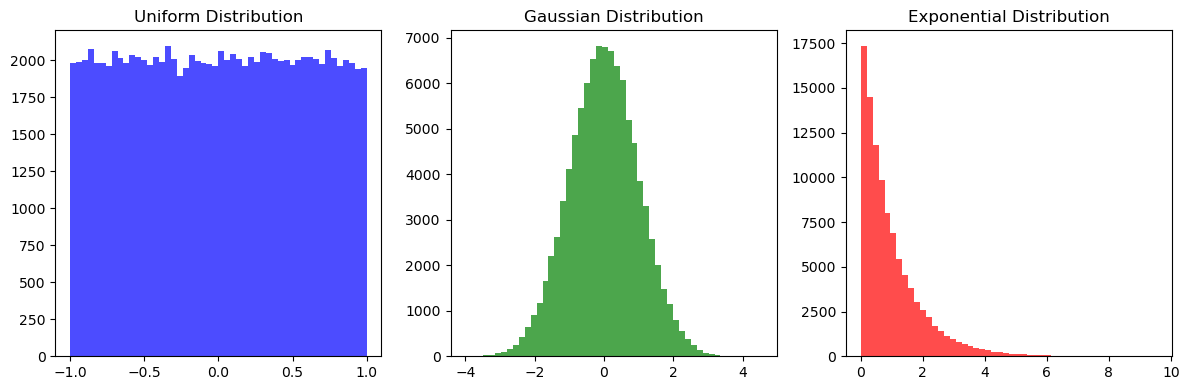

Uniform Distribution: Mean = -0.001023499852925976 , Std = 0.5766800105991609
Gaussian Distribution: Mean = 0.002615834031760416 , Std = 0.9982554521150752
Exponential Distribution: Mean = 1.0002186667230184 , Std = 1.0018066390637457


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 100000

# Generate floating-point numbers
uniform_data = np.random.uniform(low=-1, high=1, size=num_samples)  # Uniform distribution
gaussian_data = np.random.normal(loc=0, scale=1, size=num_samples)   # Normal (Gaussian) distribution
exponential_data = np.random.exponential(scale=1, size=num_samples)  # Exponential distribution

# Plot histograms to visualize the distributions
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(uniform_data, bins=50, color='blue', alpha=0.7)
plt.title("Uniform Distribution")

plt.subplot(1, 3, 2)
plt.hist(gaussian_data, bins=50, color='green', alpha=0.7)
plt.title("Gaussian Distribution")

plt.subplot(1, 3, 3)
plt.hist(exponential_data, bins=50, color='red', alpha=0.7)
plt.title("Exponential Distribution")

plt.tight_layout()
plt.show()

# Print basic statistics
print("Uniform Distribution: Mean =", np.mean(uniform_data), ", Std =", np.std(uniform_data))
print("Gaussian Distribution: Mean =", np.mean(gaussian_data), ", Std =", np.std(gaussian_data))
print("Exponential Distribution: Mean =", np.mean(exponential_data), ", Std =", np.std(exponential_data))


In [2]:
import numpy as np

def float32_to_bits(f):
    """ Convert a 32-bit float to a binary representation """
    return np.frombuffer(np.float32(f).tobytes(), dtype=np.uint32)[0]

def bits_to_float32(b):
    """ Convert a binary representation back to a 32-bit float """
    return np.frombuffer(np.uint32(b).tobytes(), dtype=np.float32)[0]

def compress_float(f, bits_to_zero=8):
    """
    Apply lossy compression by zeroing out 'bits_to_zero' LSBs of the mantissa.
    - bits_to_zero: Number of least significant bits to set to zero (8-16 recommended).
    """
    bit_pattern = float32_to_bits(f)  # Convert float to binary
    mask = ~((1 << bits_to_zero) - 1)  # Create a mask to zero out the LSBs
    compressed_bits = bit_pattern & mask  # Apply mask
    return bits_to_float32(compressed_bits)  # Convert back to float

# Test compression on a single number
original_number = 3.14159265
compressed_number = compress_float(original_number, bits_to_zero=8)

print("Original Number:", original_number)
print("Compressed Number:", compressed_number)
print("Difference:", original_number - compressed_number)


Original Number: 3.14159265
Compressed Number: 3.1415405
Difference: 5.212265625020862e-05


In [7]:
import numpy as np

# Step 1: Generate floating-point data (same as before)
np.random.seed(42)
num_samples = 100000

uniform_data = np.random.uniform(low=-1, high=1, size=num_samples)
gaussian_data = np.random.normal(loc=0, scale=1, size=num_samples)
exponential_data = np.random.exponential(scale=1, size=num_samples)

# Step 2: Compression function (from previous step)
def float32_to_bits(f):
    return np.frombuffer(np.float32(f).tobytes(), dtype=np.uint32)[0]

def bits_to_float32(b):
    return np.frombuffer(np.uint32(b).tobytes(), dtype=np.float32)[0]

def compress_float(f, bits_to_zero=8):
    bit_pattern = float32_to_bits(f)
    mask = ~((1 << bits_to_zero) - 1)  # Mask to zero out the least significant bits
    compressed_bits = bit_pattern & mask
    return bits_to_float32(compressed_bits)

# Step 3: Apply compression to all data
bits_to_zero = 8  # You can change this to 12, 16, etc.
compressed_uniform = np.array([compress_float(f, bits_to_zero) for f in uniform_data])
compressed_gaussian = np.array([compress_float(f, bits_to_zero) for f in gaussian_data])
compressed_exponential = np.array([compress_float(f, bits_to_zero) for f in exponential_data])

# Step 4: Print sample comparisons
print("Uniform Data Sample:")
print("Original:", uniform_data[:5])
print("Compressed:", compressed_uniform[:5])
print()

print("Gaussian Data Sample:")
print("Original:", gaussian_data[:5])
print("Compressed:", compressed_gaussian[:5])
print()

print("Exponential Data Sample:")
print("Original:", exponential_data[:5])
print("Compressed:", compressed_exponential[:5])
print()


Uniform Data Sample:
Original: [-0.25091976  0.90142861  0.46398788  0.19731697 -0.68796272]
Compressed: [-0.25091553  0.9014282   0.46398163  0.19731522 -0.68795776]

Gaussian Data Sample:
Original: [ 0.8427111   2.52388702 -0.10013149 -2.19760439  1.42534736]
Compressed: [ 0.84269714  2.5238647  -0.10013008 -2.1975708   1.4253235 ]

Exponential Data Sample:
Original: [0.58598956 0.98108627 0.17678136 0.07219468 0.16364041]
Compressed: [0.5859833  0.9810791  0.1767807  0.07219315 0.16363907]



C:\Users\anmol\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (



Statistical Comparison Before & After Compression:

Distribution   Mean (Before)       Mean (After)        Std Dev (Before)    Std Dev (After)     
------------------------------------------------------------------------------------------
Uniform        -0.001023           -0.001024           0.576680            0.576674            
Gaussian       0.002616            0.002616            0.998255            0.998245            
Exponential    1.000219            1.000208            1.001807            1.001796            

Mean Squared Error (MSE) Between Original and Compressed Data:
Uniform Data MSE:    0.000000
Gaussian Data MSE:   0.000000
Exponential Data MSE: 0.000000


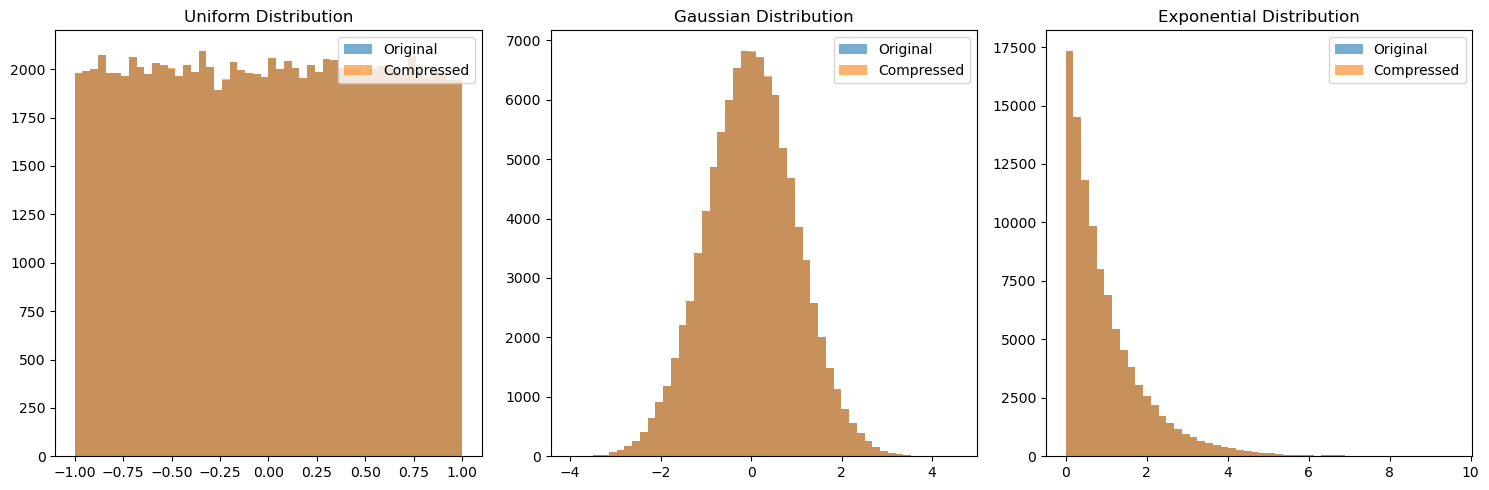

In [10]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Function to load compressed data from HDF5
def load_hdf5_compressed(filename):
    """Load float32 array from HDF5 file."""
    with h5py.File(filename, 'r') as f:
        return np.array(f['data'])

# Load compressed data
compressed_uniform = load_hdf5_compressed("uniform_compressed.h5")
compressed_gaussian = load_hdf5_compressed("gaussian_compressed.h5")
compressed_exponential = load_hdf5_compressed("exponential_compressed.h5")

# Compute Mean Squared Error (MSE)
mse_uniform = mean_squared_error(uniform_data, compressed_uniform)
mse_gaussian = mean_squared_error(gaussian_data, compressed_gaussian)
mse_exponential = mean_squared_error(exponential_data, compressed_exponential)

# Print Statistical Comparison
print("\nStatistical Comparison Before & After Compression:\n")
print(f"{'Distribution':<15}{'Mean (Before)':<20}{'Mean (After)':<20}{'Std Dev (Before)':<20}{'Std Dev (After)':<20}")
print("-" * 90)
print(f"{'Uniform':<15}{np.mean(uniform_data):<20.6f}{np.mean(compressed_uniform):<20.6f}"
      f"{np.std(uniform_data):<20.6f}{np.std(compressed_uniform):<20.6f}")
print(f"{'Gaussian':<15}{np.mean(gaussian_data):<20.6f}{np.mean(compressed_gaussian):<20.6f}"
      f"{np.std(gaussian_data):<20.6f}{np.std(compressed_gaussian):<20.6f}")
print(f"{'Exponential':<15}{np.mean(exponential_data):<20.6f}{np.mean(compressed_exponential):<20.6f}"
      f"{np.std(exponential_data):<20.6f}{np.std(compressed_exponential):<20.6f}")

# Print MSE values
print("\nMean Squared Error (MSE) Between Original and Compressed Data:")
print(f"Uniform Data MSE:    {mse_uniform:.6f}")
print(f"Gaussian Data MSE:   {mse_gaussian:.6f}")
print(f"Exponential Data MSE: {mse_exponential:.6f}")

# Plot Original vs Compressed Distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Uniform
axes[0].hist(uniform_data, bins=50, alpha=0.6, label="Original")
axes[0].hist(compressed_uniform, bins=50, alpha=0.6, label="Compressed")
axes[0].set_title("Uniform Distribution")
axes[0].legend()

# Gaussian
axes[1].hist(gaussian_data, bins=50, alpha=0.6, label="Original")
axes[1].hist(compressed_gaussian, bins=50, alpha=0.6, label="Compressed")
axes[1].set_title("Gaussian Distribution")
axes[1].legend()

# Exponential
axes[2].hist(exponential_data, bins=50, alpha=0.6, label="Original")
axes[2].hist(compressed_exponential, bins=50, alpha=0.6, label="Compressed")
axes[2].set_title("Exponential Distribution")
axes[2].legend()

plt.tight_layout()
plt.show()


